# Tensor: A data structure

In [ ]:
import torch

# A integer tensor created in the cpu
t_0 = torch.tensor([n for n in range(10)])
print(t_0)
print(t_0.dtype, t_0.device)

# A floating point tensor created in the GPU
t_1 = torch.tensor([2*n for n in range(10)], dtype=torch.float32, device='cuda')
print(t_1)
print(t_1.dtype, t_1.device)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.int64 cpu
tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.], device='cuda:0')
torch.float32 cuda:0


# Tensor: Common Manipulations (very similar to NumPy)



In [ ]:
# Vectorized operations
print(t_0**2)

# Cross device operations?
print(t_0*t_1)

tensor([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])
tensor([  0.,   2.,   8.,  18.,  32.,  50.,  72.,  98., 128., 162.],
       device='cuda:0')


# Tensor: Built-in Tensors



In [ ]:
# Zero tensor
print(torch.zeros((3, 3)))

# Random tensor
torch.manual_seed(seed=1234)
print(torch.randn((3, 3)))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[ 0.0461,  0.4024, -1.0115],
        [ 0.2167, -0.6123,  0.5036],
        [ 0.2310,  0.6931, -0.2669]])


# Tensor: From and to Numpy

In [ ]:
t_0 = torch.ones(5)
a_0 = t_0.numpy()

print(a_0, t_0)

t_0.add_(1)
print(a_0, t_0)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.])
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.])


# Dataset and Dataloader

In [3]:
import torch
import numpy as np
from torch.utils.data import Dataset, TensorDataset, DataLoader

# A toy dataset in NumPy
# np.random.seed(1234)
x_train = 2*np.random.rand(10, 1, 4, 4) - 1
y_train = np.random.randint(low=0, high=10, size=(10,))
x_test = 2*np.random.rand(5, 1, 4, 4) - 1
y_test = np.random.randint(low=0, high=10, size=(5,))

# Pack into PyTorch Dataset
train_ds = TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_ds = TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

# Define data-loader
train_dl = DataLoader(dataset=train_ds, batch_size=4, shuffle=True)

# Iterate through batches
for idx, (xb, yb) in enumerate(train_dl):
  print(f'Batch {idx}: Input -> {xb}, Target -> {yb}')

Batch 0: Input -> tensor([[[[-0.6876, -0.3054,  0.3917,  0.5108],
          [-0.8684,  0.8988,  0.9918, -0.3501],
          [-0.0141,  0.6803, -0.2376, -0.1816],
          [ 0.5860,  0.0870,  0.9826, -0.4175]]],


        [[[-0.4130, -0.3923, -0.6991, -0.5492],
          [-0.9392, -0.8366, -0.7164, -0.4392],
          [ 0.9293,  0.8698,  0.4537,  0.7670],
          [-0.5357,  0.0763, -0.9627,  0.5276]]],


        [[[ 0.4901,  0.7639,  0.8515, -0.5729],
          [ 0.4392,  0.2911, -0.5927,  0.7339],
          [ 0.3886,  0.5347, -0.4635,  0.9924],
          [ 0.6388, -0.4430, -0.2434, -0.3058]]],


        [[[-0.0332, -0.2550, -0.0856,  0.0716],
          [ 0.6831, -0.5921, -0.2662,  0.0776],
          [ 0.7272,  0.0220, -0.3117,  0.3340],
          [ 0.6797,  0.3639,  0.1936,  0.3300]]]]), Target -> tensor([1, 7, 7, 8])
Batch 1: Input -> tensor([[[[-0.2676,  0.7963, -0.8357, -0.5656],
          [ 0.5396, -0.6770,  0.4443,  0.5778],
          [-0.4106,  0.3215, -0.4232,  0.2418],
     

# Common Dataset

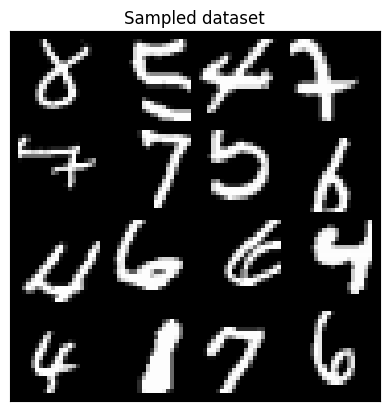

In [5]:
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


transform = transforms.Compose([
        transforms.PILToTensor(),
        transforms.RandomCrop(size=20)
        # transforms.Lambda(lambda x: x/255.0 - 0.5),
    ])
train_ds = MNIST(root='../data', train=True, download=True, transform=transform)
train_dl = DataLoader(dataset=train_ds, batch_size=16, shuffle=True)

for idx, (xb, yb) in enumerate(train_dl):
  image_grid = make_grid(xb, nrow=4).transpose(0, 2).transpose(0, 1)
  fig, ax = plt.subplots()
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set(title='Sampled dataset')
  ax.imshow(image_grid)
  plt.show()
  break